# **Files, exceptional handling, logging and**
# memory management

# **Theory Question**

Q1) What is the difference between interpreted and compiled languages?

Interpreted and compiled languages differ primarily in how they are executed by a computer. Here's a breakdown of the key differences:

1. Execution Process:
Compiled Languages:

The source code is translated into machine code (binary) by a compiler before execution.

The resulting executable file can be run directly by the computer's hardware.

Examples: C, C++, Rust, Go.

Interpreted Languages:

The source code is executed line-by-line by an interpreter at runtime, without prior conversion to machine code.

The interpreter reads and executes the code directly.

Examples: Python, JavaScript, Ruby, PHP.

2. Performance:
Compiled Languages:

Generally faster because the code is already translated into machine language, which the CPU can execute directly.

Optimization happens during compilation.

Interpreted Languages:

Typically slower because the interpreter must translate and execute the code at runtime, adding overhead.

However, modern just-in-time (JIT) compilation (used in languages like JavaScript and Python) can improve performance.

3. Portability:
Compiled Languages:

The compiled binary is specific to the target platform (e.g., Windows, macOS, Linux).

To run on a different platform, the code must be recompiled.

Interpreted Languages:

More portable because the source code can be run on any platform with the appropriate interpreter installed.

The same code can be executed across different operating systems without modification.

4. Development Cycle:
Compiled Languages:

Slower development cycle because the code must be compiled before testing or execution.

Errors are detected during compilation.

Interpreted Languages:

Faster development cycle because code can be executed immediately without a separate compilation step.

Errors are often detected at runtime.

5. Debugging:
Compiled Languages:

Debugging can be more challenging because errors are often detected at compile time, and the executable lacks the original source code context.

Interpreted Languages:

Easier to debug because errors are detected at runtime, and the interpreter can provide more detailed error messages with line numbers.

6. Examples:
Compiled Languages: C, C++, Rust, Go, Swift.

Interpreted Languages: Python, JavaScript, Ruby, PHP, Perl.

7. Hybrid Approaches:
Some languages use a mix of both approaches. For example:

Java: Compiled to bytecode, which is then interpreted or JIT-compiled by the Java Virtual Machine (JVM).

Python: Interpreted by default, but implementations like PyPy use JIT compilation for better performance.

Summary:
Compiled languages are faster and more efficient but require compilation and are less portable.

Interpreted languages are more flexible and easier to debug but may be slower due to runtime interpretation.



Q2) What is exception handling in Python?

Exception handling in Python is a mechanism to manage and respond to errors or exceptional conditions that occur during the execution of a program. It allows you to gracefully handle unexpected situations (like division by zero, file not found, or invalid input) without crashing the program. Python provides built-in tools for exception handling using the try, except, else, and finally blocks.

Key Components of Exception Handling:

try Block:

The code that might raise an exception is placed inside the try block.

If an exception occurs, the rest of the try block is skipped, and the corresponding except block is executed.

except Block:

This block catches and handles the exception raised in the try block.

You can specify the type of exception to catch (e.g., ValueError, TypeError, FileNotFoundError) or use a generic except to catch all exceptions.

else Block (Optional):

This block is executed if no exceptions are raised in the try block.

It is useful for code that should run only when the try block succeeds.

finally Block (Optional):

This block is always executed, regardless of whether an exception occurred or not.

It is typically used for cleanup actions, such as closing files or releasing resources.


        try:
        # Code that might raise an exception
        numerator = int(input("Enter the numerator: "))
        denominator = int(input("Enter the denominator: "))
        result = numerator / denominator

        except ValueError:
        # Handles invalid input (e.g., non-integer values)
        print("Invalid input! Please enter integers.")

        except ZeroDivisionError:
        # Handles division by zero
        print("Error: Cannot divide by zero!")

        else:
        # Executes if no exceptions occur
        print(f"The result is: {result}")

        finally:
        # Always executes, regardless of exceptions
        print("Execution complete.")


Custom Exeception

    class CustomError(Exception):
    pass

    try:
    raise CustomError("This is a custom exception!")

    except CustomError as e:
    print(f"Caught an exception: {e}")

Q3) What is the purpose of the finally block in exception handling?


The finally block in exception handling serves a crucial purpose: it ensures that a specific piece of code is executed no matter what, whether an exception occurs or not. This makes it ideal for cleanup actions or releasing resources that must always be performed, regardless of the program's flow.

Key Purposes of the finally Block:

Resource Cleanup:

The finally block is commonly used to release resources like file handles, database connections, or network sockets. This ensures that resources are properly freed, even if an exception occurs.

    file = None
    try:
        file = open("example.txt", "r")
        data = file.read()
        print(data)
    except FileNotFoundError:
        print("File not found!")
    finally:
        if file:
            file.close()  # Ensure the file is always closed

Guaranteed Execution:

Code in the finally block runs whether an exception is raised or not, and even if a return, break, or continue statement is encountered in the try or except blocks.

    def example():
    try:
        print("Inside try")
        return 42  # Attempt to exit the function
    finally:
        print("Inside finally")  # This will still execute
    
    example()

Avoiding Code Duplication:

Without finally, you would need to duplicate cleanup code in both the try and except blocks. The finally block centralizes this logic.

    try:
        # Some code that might raise an exception
        result = 10 / 2
    except ZeroDivisionError:
        print("Division by zero!")
    else:
        print("Result:", result)
    finally:
        print("Cleanup code runs regardless of exceptions.")

Handling Unpredictable Errors:

Even if an unhandled exception occurs, the finally block ensures that critical cleanup operations are performed before the program terminates.

    try:
    raise ValueError("An unexpected error!")
    finally:
    print("This will run even if the exception is not caught.")

Use Case:

When working with external resources (files, databases, network connections).

When you need to ensure certain actions are taken regardless of success or failure.

When you want to avoid repeating cleanup code in multiple places.

Example:

    file = None
    try:
        file = open("example.txt", "r")
        content = file.read()
        print(content)
    except FileNotFoundError:
        print("The file does not exist.")
    finally:
        if file:
            file.close()  # Ensure the file is closed
        print("File handling complete.")



Q4) What is logging in Python?

Logging in Python is a built-in module (logging) that provides a flexible and powerful way to track events in your application. It is used to record messages that describe the execution flow, errors, warnings, and other important information during the runtime of a program. Logging is essential for debugging, monitoring, and maintaining applications, especially in production environments.

Key Features of the logging Module:
Multiple Log Levels:

The logging module provides different severity levels for messages, allowing you to categorize and filter logs based on their importance.

Common log levels (in increasing order of severity):

DEBUG: Detailed information for debugging purposes.

INFO: General information about the program's execution.

WARNING: Indicates a potential issue that doesn't stop the program.

ERROR: Indicates a more serious problem that prevents a specific function from working.

CRITICAL: Indicates a severe error that may prevent the program from continuing.

Flexible Output Destinations:

Logs can be directed to various outputs, such as the console, files, email, or external logging services.

Configurable Formatting:

You can customize the format of log messages to include timestamps, log levels, file names, line numbers, and more.

Hierarchical Loggers:

Loggers can be organized hierarchically (e.g., parent.child), allowing you to control logging behavior at different levels of your application.

Thread Safety:

The logging module is thread-safe, making it suitable for multi-threaded applications.

    import logging

    Configure logging to display messages at INFO level and above

    logging.basicConfig(level=logging.INFO)

    logging.debug("This is a debug message")  # Won't be displayed

    logging.info("This is an info message")   # Will be displayed

    logging.warning("This is a warning message")  # Will be displayed

    logging.error("This is an error message")  # Will be displayed

    logging.critical("This is a critical message")  # Will be displayed

Q5) What is the significance of the __del__ method in Python?

The __del__ method in Python is a special method (also called a "magic method" or "dunder method") that defines the behavior of an object when it is about to be destroyed or garbage collected. It is known as the destructor method. While it can be useful in certain scenarios, it is important to understand its limitations and use it carefully.

Key Points About __del__:

Purpose:

The __del__ method is called when an object is no longer in use and is being garbage collected.

It can be used to perform cleanup actions, such as closing files, releasing resources, or logging the destruction of an object.

When is __del__ Called:

The __del__ method is invoked automatically by Python's garbage collector when an object's reference count drops to zero (i.e., there are no more references to the object).

It is not guaranteed to be called immediately when an object goes out of scope or is explicitly deleted using del.

Syntax:

    class MyClass:
    def __del__(self):
        print("Object is being destroyed")

Example:

    class FileHandler:
    def __init__(self, filename):
        self.file = open(filename, "r")

    def __del__(self):
        self.file.close()
        print("File closed and object destroyed")

    # Create an object
    fh = FileHandler("example.txt")
    # Delete the object explicitly
    del fh

Significance of __del__:

Resource Cleanup:

The primary use of __del__ is to ensure that resources (e.g., file handles, database connections, network sockets) are properly released when an object is no longer needed.

Debugging and Logging:

It can be used to log the destruction of an object, which can be helpful for debugging or monitoring purposes.

Custom Cleanup Logic:

If an object manages external resources or has specific cleanup requirements, __del__ can be used to implement that logic.

Q6) What is the difference between import and from ... import in Python?

In Python, both import and from ... import are used to bring external modules or specific objects (e.g., functions, classes, variables) into your current namespace. However, they differ in how they load and reference the imported content. Here's a detailed explanation of the differences:

1. import Statement:
The import statement loads an entire module into the current namespace. To access objects (functions, classes, variables) from the module, you need to prefix them with the module name.

import module_name

2. from ... import Statement:
The from ... import statement allows you to import specific objects (functions, classes, variables) from a module directly into the current namespace. You can use these objects without prefixing them with the module name.

Syntax:

from module_name import object_name

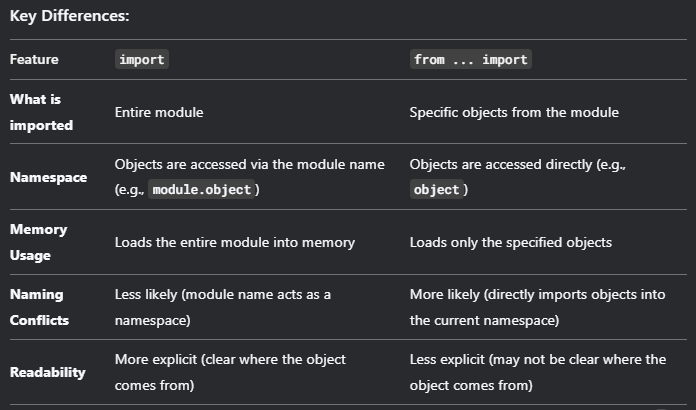




Q7) How can you handle multiple exceptions in Python?

In Python, you can handle multiple exceptions in several ways depending on your specific use case. Handling multiple exceptions allows you to manage different types of errors gracefully and provide appropriate responses or recovery mechanisms. Below are the common approaches:

1. Using Multiple except Blocks:
You can handle different exceptions separately by using multiple except blocks. Each block will catch and handle a specific type of exception.

Syntax:

    try:
    num = int(input("Enter a number: "))
    result = 10 / num
    print("Result:", result)
    except ValueError:
    print("Invalid input! Please enter a valid integer.")
    except ZeroDivisionError:
    print("Error: Cannot divide by zero!")

2. Handling Multiple Exceptions in a Single except Block:
You can handle multiple exceptions in a single except block by specifying the exceptions as a tuple. This is useful when the same handling logic applies to multiple exception types.

Syntax:

    try:
    num = int(input("Enter a number: "))
    result = 10 / num
    print("Result:", result)
    except (ValueError, ZeroDivisionError) as e:
    print(f"An error occurred: {e}")

3. Using a Base Exception Class:
You can catch all exceptions using the base Exception class. However, this is generally discouraged because it can mask unexpected errors and make debugging difficult. Use this approach only when you have a good reason to handle all exceptions uniformly.

Syntax:

    try:
    num = int(input("Enter a number: "))
    result = 10 / num
    print("Result:", result)
    except Exception as e:
    print(f"An unexpected error occurred: {e}")

4. Using else and finally Blocks:
The else block is executed if no exceptions occur in the try block.

The finally block is always executed, regardless of whether an exception occurred or not. It is typically used for cleanup actions.

Example:

    try:
    num = int(input("Enter a number: "))
    result = 10 / num
    except ValueError:
    print("Invalid input! Please enter a valid integer.")
    except ZeroDivisionError:
    print("Error: Cannot divide by zero!")
    else:
    print("Result:", result)  # Executes if no exceptions occur
    finally:
    print("Execution complete.")  # Always executes

5. Handling Exceptions Hierarchically:
Python exceptions are organized in a hierarchy, so you can catch a base exception class to handle all its derived exceptions. For example, ArithmeticError is a base class for ZeroDivisionError, OverflowError, etc.

Example:

    try:
        num = int(input("Enter a number: "))
        result = 10 / num
    except ArithmeticError:
        print("An arithmetic error occurred.")
    except ValueError:
        print("Invalid input! Please enter a valid integer.")  

6. Re-raising Exceptions:
You can catch an exception, perform some handling, and then re-raise it using the raise keyword. This is useful when you want to log an error or perform partial cleanup before propagating the exception.

Example:

    try:
    num = int(input("Enter a number: "))
    result = 10 / num
    except ValueError:
    print("Invalid input! Please enter a valid integer.")
    raise  # Re-raise the exception

Q8) What is the purpose of the with statement when handling files in Python?

The with statement in Python is used to simplify the management of resources, such as files, by ensuring that they are properly acquired and released. When handling files, the with statement is particularly useful because it automatically takes care of opening and closing the file, even if an exception occurs. This makes your code cleaner, more readable, and less error-prone.

Purpose of the with Statement:

Automatic Resource Management:

The with statement ensures that resources (e.g., file handles) are properly managed and released when they are no longer needed.

It eliminates the need to explicitly call close() on a file, reducing the risk of resource leaks.

Exception Safety:

If an exception occurs within the with block, the file is still properly closed. This prevents resource leaks and ensures that the program remains in a consistent state.

Readability and Conciseness:

The with statement makes the code more readable by clearly defining the scope of resource usage.

Example: Reading a File

    # Using 'with' to read a file
    with open("example.txt", "r") as file:
    content = file.read()
    print(content)

Example: Writing to a File

    # Using 'with' to write to a file
    with open("example.txt", "w") as file:
    file.write("Hello, World!")


Q9) What is the difference between multithreading and multiprocessing?


Multithreading and multiprocessing are two approaches to achieving concurrency in Python (and other programming languages). They allow you to perform multiple tasks simultaneously, but they differ in how they manage resources, memory, and execution. Here's a detailed comparison:

1. Definition:

Multithreading:

Uses multiple threads within a single process.

Threads share the same memory space and resources of the process.

Suitable for I/O-bound tasks (e.g., file I/O, network requests).

Multiprocessing:

Uses multiple processes, each with its own memory space and resources.

Processes do not share memory (unless explicitly configured).

Suitable for CPU-bound tasks (e.g., heavy computations).

2. Memory Usage:

Multithreading:

Threads share the same memory space, which can lead to issues like race conditions or deadlocks if not properly synchronized.

More memory-efficient since threads share resources.

Multiprocessing:

Each process has its own memory space, so there is no risk of memory corruption between processes.

Consumes more memory because each process has its own copy of the data.

3. Performance:

Multithreading:

Limited by the Global Interpreter Lock (GIL) in Python, which allows only one thread to execute Python bytecode at a time.

Best for I/O-bound tasks where threads spend time waiting (e.g., for I/O operations).

Multiprocessing:

Not limited by the GIL, as each process runs independently.

Best for CPU-bound tasks where parallel computation is needed.

4. Complexity:

Multithreading:

Requires careful synchronization (e.g., using locks, semaphores) to avoid race conditions.

Debugging can be challenging due to shared memory and potential deadlocks.

Multiprocessing:

Easier to implement for CPU-bound tasks since processes do not share memory.

Requires inter-process communication (IPC) mechanisms (e.g., queues, pipes) to share data between processes.

5. Use Cases:

Multithreading:

I/O-bound tasks (e.g., downloading multiple files, handling multiple network connections).

Tasks that involve waiting (e.g., user input, database queries).

Multiprocessing:

CPU-bound tasks (e.g., mathematical computations, data processing).

Tasks that require true parallel execution.

6. Python Implementation:

Multithreading:

Implemented using the threading module.

Example:

    import threading

    def task():
        print("Task executed")

    threads = []
    for _ in range(5):
        thread = threading.Thread(target=task)
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

Multiprocessing:

Implemented using the multiprocessing module.

Example:

    import multiprocessing

    def task():
        print("Task executed")

    processes = []
    for _ in range(5):
        process = multiprocessing.Process(target=task)
        processes.append(process)
        process.start()

    for process in processes:
        process.join()


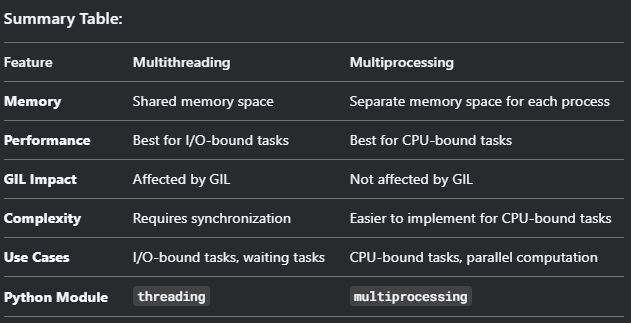

Q10) What are the advantages of using logging in a program?


Logging is a crucial practice in software development that provides a structured way to record information about the execution of a program. It offers several advantages that make it indispensable for debugging, monitoring, and maintaining applications. Here are the key advantages of using logging in a program:

1. Debugging and Troubleshooting:
Detailed Information: Logging provides detailed information about the program's execution flow, making it easier to identify and fix bugs.

Error Context: When an error occurs, logs can provide context (e.g., variable values, stack traces) that helps diagnose the issue.

Example:

    import logging

    logging.basicConfig(level=logging.DEBUG)
    logging.debug("Starting calculation")
    try:
        result = 10 / 0
    except ZeroDivisionError as e:
        logging.error(f"Division by zero: {e}")

2. Monitoring and Auditing:
Track Program Behavior: Logs allow you to monitor the program's behavior in real-time or retrospectively.

Audit Trails: Logs can serve as an audit trail for security, compliance, or operational purposes.

Example:

    import logging

    logging.basicConfig(filename="app.log", level=logging.INFO)
    logging.info("User logged in: admin")

3. Performance Analysis:
Identify Bottlenecks: Logs can help identify performance bottlenecks by recording the time taken for specific operations.

Optimize Code: By analyzing logs, you can optimize slow or inefficient parts of the code.

Example:

    import logging
    import time

    logging.basicConfig(level=logging.INFO)

    start_time = time.time()
    # Perform some operation
    time.sleep(2)
    end_time = time.time()
    logging.info(f"Operation took {end_time - start_time:.2f} seconds")

4. Error Reporting and Recovery:
Proactive Error Handling: Logs can help detect errors early, allowing for proactive fixes before they escalate.

Recovery Information: In case of failures, logs provide information to recover the system or data.

Example:

    import logging

    logging.basicConfig(level=logging.ERROR)

    try:
        file = open("nonexistent.txt", "r")
    except FileNotFoundError as e:
        logging.error(f"File not found: {e}")

5. Improved Maintainability:
Documentation: Logs serve as a form of runtime documentation, helping developers understand how the program behaves.

Easier Maintenance: Well-structured logs make it easier to maintain and update the codebase.

Example:

    import logging

    logging.basicConfig(level=logging.INFO)
    logging.info("Application started")

6. Customizable Output:
Flexible Formatting: Logs can be formatted to include timestamps, log levels, file names, line numbers, and more.

Multiple Destinations: Logs can be directed to different outputs (e.g., console, files, external services).

Example:

    import logging

    logging.basicConfig(
        level=logging.INFO,
        format="%(asctime)s - %(levelname)s - %(message)s",
        filename="app.log"
    )
    logging.info("This is a formatted log message")

7. Scalability:
Handle Large Applications: Logging scales well for large applications, allowing you to manage logs from multiple modules or services.

Centralized Logging: In distributed systems, logs can be aggregated and analyzed centrally.

Example:

    import logging

    logger = logging.getLogger("my_app")
    logger.setLevel(logging.DEBUG)

    # Add handlers for different outputs
    file_handler = logging.FileHandler("app.log")
    console_handler = logging.StreamHandler()

    logger.addHandler(file_handler)
    logger.addHandler(console_handler)

    logger.info("Logging from multiple handlers")

8. Security and Compliance:
Track Security Events: Logs can record security-related events (e.g., login attempts, access violations).

Meet Regulatory Requirements: Logs help meet compliance requirements by providing a record of system activity.

Example:

    import logging

    logging.basicConfig(filename="security.log", level=logging.WARNING)
    logging.warning("Unauthorized access attempt detected")

9. Historical Analysis:
Track Changes Over Time: Logs provide a historical record of the program's behavior, which can be analyzed to identify trends or recurring issues.

Post-Mortem Analysis: In case of failures, logs can be used for post-mortem analysis to determine the root cause.

Example:

    import logging

    logging.basicConfig(filename="history.log", level=logging.INFO)
    logging.info("Application version 1.2 deployed")

    

Q11) What is memory management in Python?

Memory management in Python refers to the way Python handles the allocation and deallocation of memory for objects during program execution. Python abstracts much of the low-level memory management details, making it easier for developers to focus on writing code. However, understanding how Python manages memory can help you write more efficient and optimized programs.

Key Concepts in Python Memory Management:
Dynamic Memory Allocation:

Python automatically allocates memory for objects when they are created (e.g., variables, lists, dictionaries).

The amount of memory allocated depends on the size and type of the object.

Garbage Collection:

Python uses a garbage collector to automatically reclaim memory that is no longer in use (i.e., memory occupied by objects that are no longer referenced).

This prevents memory leaks and ensures efficient memory usage.

Reference Counting:

Python uses reference counting to track the number of references to an object.

When an object's reference count drops to zero, it is no longer accessible, and its memory is deallocated.

Memory Pools:

Python manages memory in private heaps, which are divided into pools for small objects.

This reduces fragmentation and improves memory allocation efficiency.

Object-Specific Memory Allocators:

Python has specialized memory allocators for different types of objects (e.g., integers, strings, lists) to optimize performance.

Python Manages Memory:

1. Object Creation and Allocation:
When you create an object (e.g., x = 10), Python allocates memory for it in the private heap.

The Python memory manager handles the allocation and ensures that the object has a unique identity (memory address).

2. Reference Counting:
Each object in Python has a reference count, which tracks how many variables or objects refer to it.

When you assign an object to a variable, its reference count increases. When the variable goes out of scope or is reassigned, the reference count decreases.

Example:

    x = 10  # Reference count of 10 is 1
    y = x   # Reference count of 10 is 2
    del x   # Reference count of 10 is 1
    y = 20  # Reference count of 10 is 0 (memory is deallocated)

3. Garbage Collection:
Python's garbage collector identifies and collects objects that are no longer referenced (i.e., their reference count is zero).

It also handles cyclic references (e.g., two objects referencing each other but no longer accessible from the program).

4. Memory Pools and Arenas:
Python uses memory pools to manage small objects efficiently.

Memory is divided into blocks, pools, and arenas to minimize fragmentation and improve allocation speed.

5. Memory Deallocation:
When an object's reference count drops to zero, its memory is deallocated and returned to the system.

The garbage collector periodically runs to clean up unreachable objects.



Q12) What are the basic steps involved in exception handling in Python?

Exception handling in Python is a mechanism to manage and respond to errors or exceptional conditions that occur during the execution of a program. It allows you to gracefully handle unexpected situations (like division by zero, file not found, or invalid input) without crashing the program. The basic steps involved in exception handling are as follows:

1. Identify the Code That Might Raise an Exception:
Use a try block to enclose the code that might raise an exception.

This is the code you want to monitor for errors.

2. Handle Specific Exceptions:
Use one or more except blocks to catch and handle specific exceptions.

Each except block specifies the type of exception it can handle.

3. Handle All Exceptions (Optional):
Use a generic except block to catch all exceptions that are not explicitly handled.

This is useful for logging or providing a fallback response.

4. Execute Code When No Exceptions Occur (Optional):
Use an else block to execute code that should run only if no exceptions are raised in the try block.

5. Execute Cleanup Code (Optional):
Use a finally block to execute code that should always run, regardless of whether an exception occurred or not.

This is typically used for cleanup actions, such as closing files or releasing resources.

    try:
        # Step 1: Code that might raise an exception
        num = int(input("Enter a number: "))
        result = 10 / num
    except ValueError:
        # Step 2: Handle specific exception (invalid input)
        print("Invalid input! Please enter a valid integer.")
    except ZeroDivisionError:
        # Step 2: Handle specific exception (division by zero)
        print("Error: Cannot divide by zero!")
    except Exception as e:
        # Step 3: Handle all other exceptions
        print(f"An unexpected error occurred: {e}")
    else:
        # Step 4: Execute if no exceptions occur
        print(f"The result is: {result}")
    finally:
        # Step 5: Always execute cleanup code
        print("Execution complete.")

Steps in Summary:

try Block:

Enclose the code that might raise an exception.

except Block(s):

Catch and handle specific exceptions or all exceptions.

else Block (Optional):

Execute code if no exceptions occur.

finally Block (Optional):

Execute cleanup code that always runs, regardless of exceptions.

Q13) Why is memory management important in Python?

Memory management is a critical aspect of programming in Python (and other languages) because it directly impacts the performance, stability, and efficiency of your application. In Python, memory management is mostly handled automatically by the Python memory manager and garbage collector, but understanding its importance can help you write better, more efficient code. Here are the key reasons why memory management is important in Python:


1. Prevents Memory Leaks:
What is a Memory Leak?

A memory leak occurs when memory that is no longer needed is not released, causing the program to consume more and more memory over time.

Why It Matters:

Memory leaks can lead to increased memory usage, slowing down the system and eventually causing the program to crash due to insufficient memory.

How Python Helps:

Python's garbage collector automatically reclaims memory that is no longer in use, preventing memory leaks.

2. Optimizes Resource Usage:
Efficient Memory Allocation:

Proper memory management ensures that memory is allocated and deallocated efficiently, reducing wasted resources.

Why It Matters:

Efficient memory usage is crucial for applications running on systems with limited resources (e.g., embedded systems, mobile devices).

How Python Helps:

Python uses memory pools and specialized allocators to optimize memory allocation for small objects.

3. Improves Performance:
Reduces Overhead:

Effective memory management minimizes the overhead associated with frequent memory allocation and deallocation.

Why It Matters:

Poor memory management can lead to performance bottlenecks, especially in CPU-bound or memory-intensive applications.

How Python Helps:

Python's memory manager and garbage collector work together to ensure smooth and efficient memory operations.

4. Ensures Program Stability:
Prevents Crashes:

Proper memory management prevents issues like segmentation faults, null pointer exceptions, and out-of-memory errors.

Why It Matters:

A stable program is essential for user satisfaction and reliability, especially in production environments.

How Python Helps:

Python's automatic memory management reduces the risk of manual memory management errors (e.g., double-free, use-after-free).

5. Supports Scalability:
Handles Large Datasets:

Effective memory management allows programs to handle large datasets and complex computations without running out of memory.

Why It Matters:

Scalability is critical for applications that need to process large amounts of data or serve many users simultaneously.

How Python Helps:

Python's memory management mechanisms (e.g., garbage collection, reference counting) ensure that memory is reused efficiently.

6. Facilitates Debugging and Maintenance:
Easier Debugging:

Proper memory management makes it easier to identify and fix memory-related issues (e.g., memory leaks, excessive memory usage).

Why It Matters:

Debugging memory issues can be challenging, and good memory management practices simplify the process.

How Python Helps:

Tools like gc, tracemalloc, and memory_profiler help developers monitor and debug memory usage.

7. Enhances Security:
Prevents Vulnerabilities:

Poor memory management can lead to security vulnerabilities like buffer overflows, which can be exploited by attackers.

Why It Matters:

Security is a top priority for applications handling sensitive data or running in critical environments.

How Python Helps:

Python's high-level memory management reduces the risk of low-level memory-related vulnerabilities.

8. Supports Cross-Platform Compatibility:
Consistent Behavior:

Python's memory management ensures consistent behavior across different platforms (e.g., Windows, macOS, Linux).

Why It Matters:

Cross-platform compatibility is essential for applications that need to run on multiple operating systems.

How Python Helps:

Python abstracts platform-specific memory management details, providing a consistent interface for developers.

9. Enables Efficient Garbage Collection:
Automatic Cleanup:

Python's garbage collector automatically reclaims memory that is no longer in use, reducing the need for manual memory management.

Why It Matters:

Manual memory management is error-prone and time-consuming, and automatic garbage collection simplifies the process.

How Python Helps:

Python uses reference counting and cyclic garbage collection to manage memory efficiently.

10. Improves Developer Productivity:
Focus on Logic:

Python's automatic memory management allows developers to focus on writing application logic rather than managing memory manually.

Why It Matters:

Increased productivity leads to faster development cycles and quicker time-to-market.

How Python Helps:

Python's high-level abstractions and memory management tools reduce the cognitive load on developers.

Q14) What is the role of try and except in exception handling?

In Python, the try and except blocks are fundamental components of exception handling. They allow you to manage and respond to errors or exceptional conditions that occur during the execution of a program. Here's a detailed explanation of their roles:

1. try Block:
Purpose:

The try block is used to enclose the code that might raise an exception.

It allows you to monitor a section of code for errors during execution.

How It Works:

If an exception occurs within the try block, the rest of the block is skipped, and the corresponding except block is executed.

If no exception occurs, the try block runs to completion, and the except block is skipped.

Example:

    try:
    num = int(input("Enter a number: "))
    result = 10 / num

2. except Block:
Purpose:

The except block is used to catch and handle exceptions that occur in the try block.

It specifies the type of exception to catch and the code to execute when that exception occurs.

How It Works:

If an exception of the specified type occurs in the try block, the corresponding except block is executed.

You can have multiple except blocks to handle different types of exceptions.

Example:

    except ValueError:
        print("Invalid input! Please enter a valid integer.")
    except ZeroDivisionError:
        print("Error: Cannot divide by zero!")

3. Handling Multiple Exceptions:
You can handle multiple exceptions in a single except block by specifying them as a tuple.

This is useful when the same handling logic applies to multiple exception types.

Example:

    try:
        num = int(input("Enter a number: "))
        result = 10 / num
    except (ValueError, ZeroDivisionError) as e:
        print(f"An error occurred: {e}")

4. Catching All Exceptions:
You can use a generic except block to catch all exceptions that are not explicitly handled.

This is useful for logging or providing a fallback response.

Example:

    try:
        num = int(input("Enter a number: "))
        result = 10 / num
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

5. Accessing Exception Details:
You can access the exception object using the as keyword to get more details about the error (e.g., error message, type).

Example:

    try:
        num = int(input("Enter a number: "))
        result = 10 / num
    except ZeroDivisionError as e:
        print(f"Error: {e}")

6. Combining with else and finally:
else Block:

The else block is executed if no exceptions occur in the try block.

It is useful for code that should run only when the try block succeeds.

finally Block:

The finally block is always executed, regardless of whether an exception occurred or not.

It is typically used for cleanup actions, such as closing files or releasing resources.

Example:

    try:
        num = int(input("Enter a number: "))
        result = 10 / num
    except ValueError:
        print("Invalid input! Please enter a valid integer.")
    except ZeroDivisionError:
        print("Error: Cannot divide by zero!")
    else:
        print(f"The result is: {result}")
    finally:
        print("Execution complete.")

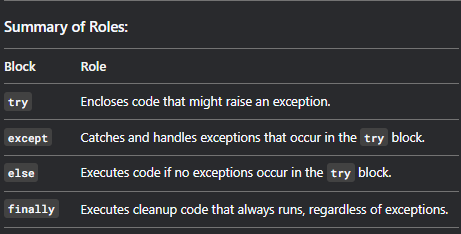

Q15) How does Python's garbage collection system work?

Python's garbage collection system is responsible for automatically managing memory by reclaiming memory that is no longer in use (i.e., memory occupied by objects that are no longer accessible). This prevents memory leaks and ensures efficient memory usage. Python uses a combination of reference counting and a cyclic garbage collector to manage memory. Here's a detailed explanation of how it works:

1. Reference Counting:
What is Reference Counting?

Every object in Python has a reference count, which tracks the number of references (variables, data structures, etc.) pointing to it.

When an object's reference count drops to zero, it is no longer accessible, and its memory is deallocated immediately.

How It Works:

When you create an object (e.g., x = 10), its reference count is set to 1.

When you assign the object to another variable (e.g., y = x), its reference count increases to 2.

When a variable goes out of scope or is reassigned (e.g., x = 20), the reference count decreases.

When the reference count reaches zero, the object is deallocated.

Example:

    x = 10  # Reference count of 10 is 1
    y = x   # Reference count of 10 is 2
    del x   # Reference count of 10 is 1
    y = 20  # Reference count of 10 is 0 (memory is deallocated)

2. Cyclic Garbage Collector:
What are Cyclic References?

Cyclic references occur when two or more objects reference each other, creating a cycle that prevents their reference counts from dropping to zero.

Example:

    class Node:
        def __init__(self):
            self.next = None

    # Create cyclic references
    a = Node()
    b = Node()
    a.next = b
    b.next = a
    # Even if 'a' and 'b' go out of scope, their reference counts remain 1

How the Cyclic Garbage Collector Works:

Python's cyclic garbage collector identifies and collects objects involved in reference cycles.

It runs periodically and uses a generational approach to optimize performance:

Generations: Objects are categorized into three generations (0, 1, 2) based on their age.

Frequency of Collection: Younger generations are collected more frequently than older ones.

The garbage collector traverses the object graph, starting from known roots (e.g., global variables, stack frames), and marks reachable objects.

Unreachable objects (those not part of any reference cycle) are deallocated.

Example:

    import gc

    class Node:
        def __init__(self):
            self.next = None

    # Create cyclic references
    a = Node()
    b = Node()
    a.next = b
    b.next = a

    # Delete references
    del a
    del b

    # Manually trigger garbage collection
    gc.collect()

. Manual Control of Garbage Collection:
Python provides the gc module to interact with the garbage collector.

You can manually control garbage collection or inspect its behavior.

Functions in the gc Module:

gc.collect(): Manually trigger garbage collection.

gc.get_count(): Get the current garbage collection counts for each generation.

gc.get_threshold(): Get the collection thresholds for each generation.

gc.set_threshold(): Set the collection thresholds for each generation.

gc.disable(): Disable the garbage collector.

gc.enable(): Enable the garbage collector.

Example:

    import gc

    # Disable garbage collection
    gc.disable()

    # Enable garbage collection
    gc.enable()

    # Manually trigger garbage collection
    gc.collect()

    # Get current garbage collection counts
    print(gc.get_count())  # Output: (generation_0_count, generation_1_count, generation_2_count)

4. Best Practices for Garbage Collection:
Avoid Cyclic References:

Design your classes and data structures to minimize cyclic references.

Use Context Managers:

Use with statements or context managers (e.g., open() for files) to ensure resources are released promptly.

Monitor Memory Usage:

Use tools like tracemalloc or memory_profiler to identify memory leaks or inefficient memory usage.

Minimize Object Creation:

Reuse objects where possible to reduce memory allocation overhead.

Q16) What is the purpose of the else block in exception handling?

In Python's exception handling, the else block is an optional part of the try statement. It is used to define code that should be executed only if no exceptions occur in the try block. The else block helps separate the code that might raise exceptions from the code that should run only when the try block succeeds. This improves readability and ensures that the else block runs only under successful conditions.

Purpose of the else Block:
Clarity and Readability:

The else block makes it clear which code is part of the error-prone section (try block) and which code should run only if no errors occur.

It avoids the need to place additional code inside the try block, which could accidentally catch unintended exceptions.

Conditional Execution:

The else block ensures that certain code runs only when the try block completes successfully without raising any exceptions.

Separation of Concerns:

It separates the error-handling logic (except blocks) from the normal execution flow (else block), making the code easier to maintain and debug.

    try:
        # Code that might raise an exception
        risky_operation()
    except SomeException:
        # Handle the exception
        handle_error()
    else:
        # Code to execute if no exceptions occur
        perform_success_action()
    finally:
        # Cleanup code (always executes)
        cleanup()

Summary:
The else block in exception handling is used to define code that should execute only if no exceptions occur in the try block. It helps separate error-prone code from normal execution flow, making the code cleaner and easier to understand. Use the else block to ensure that certain actions are performed only under successful conditions.

Q16) What is the purpose of the else block in exception handling?

In Python's exception handling, the else block is an optional part of the try statement. It is used to define code that should be executed only if no exceptions occur in the try block. The else block helps separate the code that might raise exceptions from the code that should run only when the try block succeeds. This improves readability and ensures that the else block runs only under successful conditions.

Purpose of the else Block:

Clarity and Readability:

The else block makes it clear which code is part of the error-prone section (try block) and which code should run only if no errors occur.

It avoids the need to place additional code inside the try block, which could accidentally catch unintended exceptions.

Conditional Execution:

The else block ensures that certain code runs only when the try block completes successfully without raising any exceptions.

Separation of Concerns:

It separates the error-handling logic (except blocks) from the normal execution flow (else block), making the code easier to maintain and debug.

Example:


    try:
        num = int(input("Enter a number: "))
        result = 10 / num
    except ValueError:
        print("Invalid input! Please enter a valid integer.")
    except ZeroDivisionError:
        print("Error: Cannot divide by zero!")
    else:
        print(f"The result is: {result}")  # Executes only if no exceptions occur
    finally:
        print("Execution complete.")  # Always executes

Summary:
The else block in exception handling is used to define code that should execute only if no exceptions occur in the try block. It helps separate error-prone code from normal execution flow, making the code cleaner and easier to understand. Use the else block to ensure that certain actions are performed only under successful conditions.




Q17) What are the common logging levels in Python?

In Python's logging module, logging levels are used to categorize and prioritize log messages based on their severity. Each level corresponds to a specific type of event or message, allowing you to control the granularity of logging in your application. Here are the common logging levels, listed in increasing order of severity:

1. DEBUG (Level: 10):
Purpose: Detailed information for debugging purposes.

Use Case: Used to log fine-grained events that are useful for diagnosing issues during development.

Example:

    logging.debug("This is a debug message.")

2. INFO (Level: 20):
Purpose: General information about the program's execution.

Use Case: Used to log events that confirm the program is working as expected.

Example:

    logging.info("Application started successfully.")

3. WARNING (Level: 30):
Purpose: Indicates a potential issue that does not prevent the program from running.

Use Case: Used to log events that might cause problems in the future but are not currently critical.

Example:

    logging.warning("Disk space is running low.")

4. ERROR (Level: 40):
Purpose: Indicates a more serious problem that prevents a specific function from working.

Use Case: Used to log errors that need attention but do not cause the program to crash.

Example:

    logging.error("Failed to connect to the database.")

5. CRITICAL (Level: 50):
Purpose: Indicates a severe error that may prevent the program from continuing.

Use Case: Used to log critical failures that require immediate attention.

Example:

    logging.critical("System is out of memory.")


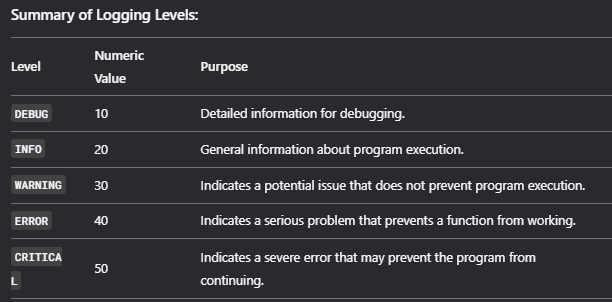

Q18) What is the difference between os.fork() and multiprocessing in Python?

In Python, both os.fork() and the multiprocessing module are used to create new processes, but they differ in their approach, functionality, and use cases. Here's a detailed comparison:

1. Platform Compatibility:
os.fork(): Works only on Unix-like systems (Linux, macOS). It is not available on Windows.

multiprocessing: Works on all platforms, including Windows.

2. Process Creation:
os.fork(): Creates a child process that is an exact copy of the parent process, including its memory and execution state.

multiprocessing: Creates a new process with a fresh Python interpreter, avoiding issues related to shared memory and state.

3. Resource Management:
os.fork(): Requires manual management of shared resources (e.g., file descriptors, memory).

multiprocessing: Automatically manages resources and provides tools like Queue, Pipe, and Manager for inter-process communication.

4. Synchronization:
os.fork(): Requires manual synchronization using mechanisms like os.wait() or os.waitpid().

multiprocessing: Provides built-in synchronization tools like Lock, Semaphore, and Event.

5. Ease of Use:
os.fork(): More complex and error-prone, especially for beginners.

multiprocessing: Easier to use and more intuitive, with a high-level API.

6. Use Cases:
os.fork(): Suitable for low-level system programming or when you need fine-grained control over process creation.

multiprocessing: Suitable for general-purpose multiprocessing tasks, such as parallel computation or task distribution.


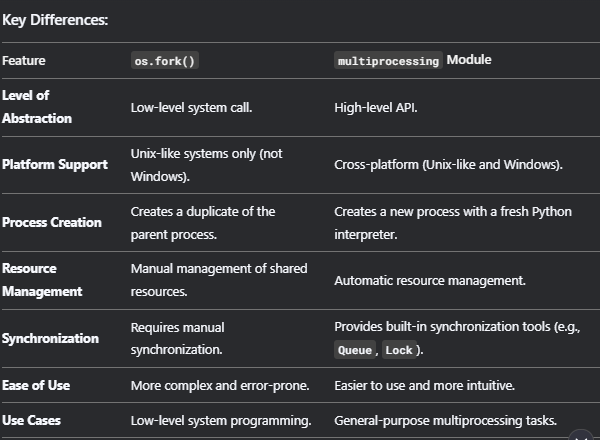

Example: os.fork() vs multiprocessing

Using os.fork():

    import os

    def child_process():
        print("Child process:", os.getpid())

    def parent_process():
        print("Parent process:", os.getpid())

    pid = os.fork()
    if pid == 0:
        child_process()
    else:
        parent_process()
        os.wait()  # Wait for the child process to finish

Using multiprocessing:

    from multiprocessing import Process
    import os

    def worker():
        print("Worker process:", os.getpid())

    if __name__ == "__main__":
        p = Process(target=worker)
        p.start()
        p.join()  # Wait for the process to finish

Q19) What is the importance of closing a file in Python?

Closing a file in Python is important for several reasons:

Freeing Up Resources: When a file is opened, it consumes system resources (such as file descriptors). Closing it ensures these resources are released properly.

Avoiding Data Loss: If you write to a file and don’t close it, some data may remain in the buffer and not be written to disk until the program ends. Closing the file ensures all data is saved.

Preventing File Corruption: If a file is not closed properly, it may become corrupted, especially when multiple processes access it.

Allowing Other Programs to Access the File: Some operating systems lock files when they are open. Closing the file ensures that other processes or users can access it.

Good Practice: Explicitly closing a file is considered a good coding practice, reducing the chance of unexpected behavior.

Best Practice: Using with Statement
Instead of manually calling .close(), it's best to use a with statement, which automatically closes the file:

    with open("example.txt", "w") as file:
    file.write("Hello, World!")
    File is automatically closed after the block


Q20) What is the difference between file.read() and file.readline() in Python?

In Python, the file.read() and file.readline() methods are used to read data from a file, but they differ in how they read and return the data. Here's a detailed comparison:

1. file.read():
What It Does:

Reads the entire content of the file or a specified number of characters/bytes.

Behavior:

If no argument is provided, it reads the entire file and returns it as a single string.

If an argument n is provided, it reads up to n characters (for text files) or n bytes (for binary files).

Use Case:

Useful when you need to read the entire file content at once or a specific chunk of data.

Example:

    with open("example.txt", "r") as file:
        content = file.read()  # Reads the entire file
        print(content)

2. file.readline():
What It Does:

Reads a single line from the file, including the newline character (\n).

Behavior:

Each call to file.readline() reads the next line in the file.

Returns an empty string when the end of the file (EOF) is reached.

Use Case:

Useful when you need to process a file line by line.

Example:

    with open("example.txt", "r") as file:
        line = file.readline()  # Reads the first line
        while line:
            print(line, end="")  # Process the line
            line = file.readline()  # Read the next line

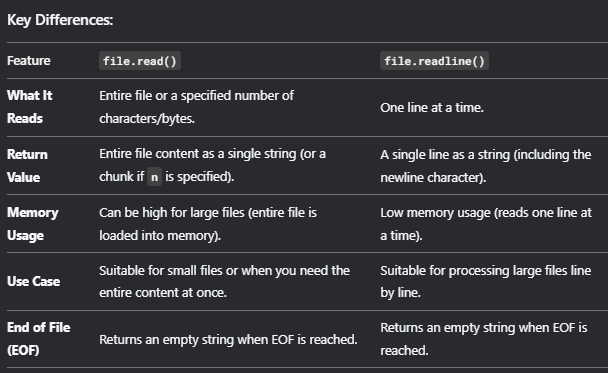

Q21) What is the logging module in Python used for?

The logging module in Python is used for tracking events that happen while a program runs. It provides a flexible way to record messages, errors, warnings, and other debugging information.

Why Use the logging Module?

Debugging & Troubleshooting – Helps diagnose issues by logging errors and system behavior.
Monitoring & Auditing – Tracks program execution, which is useful for security and performance analysis.
Better Than Print Statements – Unlike print(), logs can be saved to files, formatted, and categorized.
Granular Control – Supports different levels of logging (e.g., DEBUG, INFO, WARNING, ERROR, CRITICAL).
Multiple Destinations – Logs can be written to files, the console, or external services.

Basic Usage Example:

    import logging

    #Configure logging

    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

    #Logging messages

    logging.debug("This is a debug message")   # Won't appear due to INFO level
    logging.info("This is an info message")
    logging.warning("This is a warning!")
    logging.error("This is an error!")
    logging.critical("This is critical!")

Logging to a File

    logging.basicConfig(filename="app.log", level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(message)s")
    logging.info("This will be written to a file")


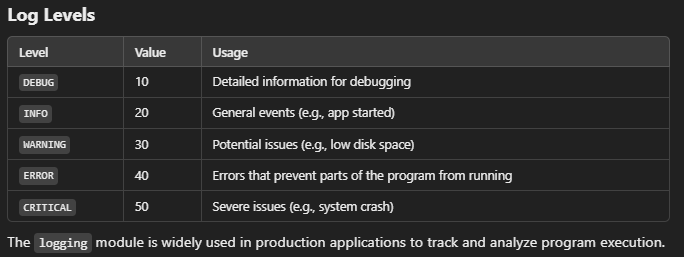


Q22) What is the os module in Python used for in file handling?

The os module in Python is used for interacting with the operating system, especially for file and directory handling. It provides functions to create, delete, move, and manage files and directories.

Common Uses of the os Module in File Handling

Checking if a File or Directory Exists

    import os
    print(os.path.exists("example.txt"))  # True if file exists
    print(os.path.isdir("my_folder"))     # True if it's a directory
    print(os.path.isfile("example.txt"))  # True if it's a file

Creating a Directory

    os.mkdir("new_folder")  # Creates a new folder
    os.makedirs("parent/child")  # Creates nested directories

Removing a File or Directory

    os.remove("example.txt")  # Deletes a file
    os.rmdir("empty_folder")  # Deletes an empty directory

Renaming or Moving a File

    os.rename("old_name.txt", "new_name.txt")  # Renames a file
    os.replace("file.txt", "new_folder/file.txt")  # Moves a file

Getting the Current Working Directory

    print(os.getcwd())  # Prints the current working directory

Changing the Working Directory

    os.chdir("C:/Users/Username/Desktop")  # Change to a specific directory

Listing Files and Folders in a Directory

    print(os.listdir("."))  # Lists all files and directories in the current directory

Getting File Information

    file_info = os.stat("example.txt")
    print(file_info.st_size)  # File size in bytes
    print(file_info.st_mtime) # Last modified time






Q23) What are the challenges associated with memory management in Python?

Memory management in Python is mostly handled automatically by the Python memory manager and garbage collector, but it still presents several challenges, especially in large or complex applications. Here are the key challenges associated with memory management in Python:

1. Memory Leaks:
What It Is:

A memory leak occurs when memory that is no longer needed is not released, causing the program to consume more and more memory over time.

Causes:

Cyclic references that the garbage collector cannot detect.

Unintentional retention of objects (e.g., global variables, caches).

Impact:

Can lead to increased memory usage, slowing down the system and eventually causing the program to crash due to insufficient memory.

Example:

    class Node:
        def __init__(self):
            self.next = None

    # Create cyclic references
    a = Node()
    b = Node()
    a.next = b
    b.next = a
    # Even if 'a' and 'b' go out of scope, their memory is not released

2. Cyclic References:
What It Is:

Cyclic references occur when two or more objects reference each other, creating a cycle that prevents their reference counts from dropping to zero.

Impact:

The garbage collector must periodically identify and collect such cycles, which adds overhead.

Solution:

Use weak references (weakref module) for objects that should not prevent garbage collection.

Example:

    import weakref

    class Node:
        def __init__(self):
            self.next = weakref.ref(self)  # Use weak reference

3. High Memory Usage:
What It Is:

Python objects consume more memory compared to lower-level languages like C due to their dynamic nature and additional overhead (e.g., reference counting, type information).

Impact:

Can lead to high memory usage, especially in applications with large datasets or many objects.

Solution:

Use data structures like array or libraries like numpy for memory-efficient storage of large datasets.

Example:

    import array

    # Use array for memory-efficient storage
    arr = array.array('i', [1, 2, 3, 4, 5])

4. Garbage Collection Overhead:
What It Is:

Python's garbage collector periodically runs to reclaim memory, which can introduce latency and affect performance.

Impact:

Can cause pauses in the program, especially in real-time or latency-sensitive applications.

Solution:

Manually control garbage collection using the gc module or disable it for performance-critical sections.

Example:

    import gc

    gc.disable()  # Disable garbage collection
    # Perform performance-critical operations
    gc.enable()   # Re-enable garbage collection

5. Fragmentation:
What It Is:

Memory fragmentation occurs when free memory is divided into small, non-contiguous blocks, making it difficult to allocate large blocks of memory.

Impact:

Can lead to inefficient memory usage and allocation failures.

Solution:

Use memory pools or specialized allocators to reduce fragmentation.

6. Inefficient Data Structures:
What It Is:

Using inappropriate data structures can lead to excessive memory usage.

Impact:

Increases memory consumption and reduces performance.

Solution:

Choose the right data structures (e.g., set for membership testing, deque for queue operations).

Example:

    from collections import deque

    # Use deque for efficient queue operations
    queue = deque()
    queue.append(1)
    queue.append(2)
    queue.popleft()

7. Unintentional Object Retention:
What It Is:

Objects may be unintentionally retained in memory due to references in global variables, caches, or closures.

Impact:

Can lead to memory bloat and leaks.

Solution:

Use weak references or explicitly delete unused objects.

Example:

    import weakref

    class Data:
        pass

    data = Data()
    weak_data = weakref.ref(data)  # Use weak reference

8. Interpreter Overhead:
What It Is:

The Python interpreter itself consumes memory, which can be significant in applications with many small objects.

Impact:

Reduces the amount of memory available for the application.

Solution:

Optimize object creation and reuse objects where possible.


9. Platform-Specific Behavior:
What It Is:

Memory management behavior can vary across different platforms (e.g., Windows vs. Unix-like systems).

Impact:

Can lead to inconsistent performance and memory usage.

Solution:

Test and optimize memory usage on all target platforms.

10. Debugging Memory Issues:
What It Is:

Identifying and fixing memory-related issues (e.g., leaks, bloat) can be challenging.

Impact:

Increases development time and complexity.

Solution:

Use tools like tracemalloc, objgraph, or memory_profiler to diagnose memory issues.

Example:

    import tracemalloc

    tracemalloc.start()
    # Perform operations
    snapshot = tracemalloc.take_snapshot()
    for stat in snapshot.statistics('lineno'):
        print(stat)

Q24)  How do you raise an exception manually in Python?

In Python, you can manually raise an exception using the raise keyword. This is useful when you want to enforce specific conditions or handle errors in a controlled way.

Basic Syntax

    raise Exception("This is a custom error message")

Raising Specific Exceptions

Python has built-in exceptions that you can raise when necessary:

    raise ValueError("Invalid value provided")
    raise TypeError("Expected a different data type")
    raise FileNotFoundError("File not found in the directory")

Using raise in a Function

You can use raise inside a function to enforce conditions:

    def divide(a, b):
        if b == 0:
            raise ZeroDivisionError("Cannot divide by zero!")
        return a / b

    print(divide(10, 2))  # Works fine
    print(divide(5, 0))   # Raises ZeroDivisionError


Raising Exceptions with try-except

You can raise an exception inside a try block and handle it in an except block:

    try:
        raise KeyError("Custom KeyError raised")
    except KeyError as e:
        print(f"Caught an exception: {e}")

Re-Raising an Exception

If you catch an exception but want to re-raise it, use raise without arguments:

    try:
        x = int("hello")  # This will cause a ValueError
    except ValueError:
        print("A ValueError occurred, re-raising...")
        raise  # Re-raises the same exception





Q25) Why is it important to use multithreading in certain applications


Importance of Multithreading in Certain Applications
Multithreading is useful in applications that require concurrent execution of tasks to improve performance, responsiveness, and efficiency. Here’s why it matters:

1. Improved Performance & Speed
In CPU-bound tasks (e.g., complex calculations), multithreading does not speed up execution due to Python’s Global Interpreter Lock (GIL).
However, in I/O-bound tasks (e.g., file operations, network requests, database queries), threads can run in parallel and avoid blocking, making the program faster.

2. Better Responsiveness
In GUI applications, multithreading prevents the UI from freezing.
Example: A media player can play music in one thread while responding to user interactions in another.

3. Efficient Resource Utilization
Instead of waiting for one task to complete (like file reading), another task can run in parallel (like updating a progress bar).
This is helpful in applications that involve multiple I/O operations.

4. Parallel Execution of Independent Tasks
Some applications require executing multiple independent tasks at the same time, such as:
A web scraper fetching multiple URLs simultaneously.
A chat application handling multiple users at once.

5. Ideal for Network & I/O-Bound Tasks
Web servers (e.g., Flask, Django) handle multiple client requests efficiently using threads.
Downloading multiple files at the same time speeds up performance.
Example: Using Multithreading in Python


    import threading
    import time

    def print_numbers():
        for i in range(5):
            print(i)
            time.sleep(1)  # Simulating a delay

    # Creating a thread
    thread = threading.Thread(target=print_numbers)

    # Starting the thread
    thread.start()

    # Main program continues running while the thread works in parallel
    print("Main thread is running...")


# Practical Questions

In [ ]:
#Q1) How can you open a file for writing in Python and write a string to it?

#You can open a file for writing in Python using the open() function with the "w" mode and then use the write() method to write a string to it.

#Basic Example: Writing to a File

    # Open the file in write mode ('w')
    with open("example.txt", "w") as file:
        file.write("Hello, this is a test message!")

#Appending Instead of Overwriting

#If you want to append to an existing file without overwriting its content, use the "a" mode:

    with open("example.txt", "a") as file:
    file.write("\nThis is an additional line.")

#Writing Multiple Lines

#You can write multiple lines using writelines():

    lines = ["Line 1\n", "Line 2\n", "Line 3\n"]
    with open("example.txt", "w") as file:
    file.writelines(lines)



In [18]:
#Q2) Write a Python program to read the contents of a file and print each line

try:
    f = open("text.txt", "r")
    for x in f:
        print(x)
except FileNotFoundError:
    print(f"Error: File not found.")


Hi, I'm Alhasan

Currently writing assignment

file handling



In [19]:
#Q3) How would you handle a case where the file doesn't exist while trying to open it for reading?

try:
    f = open("asdf.txt", "r")
    for x in f:
        print(x)
except FileNotFoundError:
    print(f"Error: File not found.")

Error: File not found.


In [20]:
#Q4) Write a Python script that reads from one file and writes its content to another file.

input_file = 'text.txt'
output_file = 'output.txt'

try:
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            outfile.write(line)

    print(f"Content from '{input_file}' has been successfully written to '{output_file}'.")

except FileNotFoundError:
    print(f"Error: The file '{input_file}' does not exist.")
except IOError as e:
    print(f"Error: An I/O error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")





Content from 'text.txt' has been successfully written to 'output.txt'.


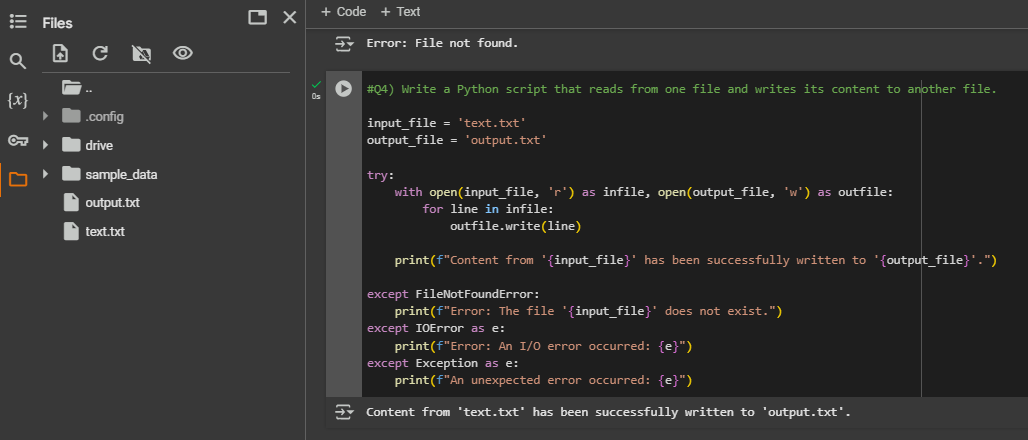

In [21]:
#Q5) How would you catch and handle division by zero error in Python?

try:
    result = 10 / 0  # This will raise a ZeroDivisionError
except ZeroDivisionError:
    print("Error: Cannot divide by zero!")


Error: Cannot divide by zero!


In [22]:
#Q6) Write a Python program that logs an error message to a log file when a division by zero exception occurs

import logging

# Configure logging
logging.basicConfig(filename="error.log", level=logging.ERROR,
                    format="%(asctime)s - %(levelname)s - %(message)s")

def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        logging.error("Attempted to divide by zero.")
        return "Error: Division by zero is not allowed!"

# Example usage
print(divide(10, 2))  # Works fine
print(divide(5, 0))   # Logs an error and prints error message


ERROR:root:Attempted to divide by zero.


5.0
Error: Division by zero is not allowed!


In [24]:
#Q7) How do you log information at different levels (INFO, ERROR, WARNING) in Python using the logging module

import logging

# Configure logging
logging.basicConfig(filename="app.log", level=logging.DEBUG,
                    format="%(asctime)s - %(levelname)s - %(message)s")

# Logging messages at different levels
logging.debug("This is a DEBUG message.")       # Lowest level
logging.info("This is an INFO message.")        # General info
logging.warning("This is a WARNING message.")   # Something might go wrong
logging.error("This is an ERROR message.")      # Something went wrong
logging.critical("This is a CRITICAL message.") # Serious failure



ERROR:root:This is an ERROR message.
CRITICAL:root:This is a CRITICAL message.


In [23]:
#Q8) Write a program to handle a file opening error using exception handling

try:
    # Attempt to open a file
    file = open("nonexistent_file.txt", "r")
    content = file.read()
    print(content)

except FileNotFoundError:
    print("Error: The file does not exist.")
except PermissionError:
    print("Error: Permission denied to open the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    # Ensure file is closed if it was opened successfully
    try:
        file.close()
    except NameError:
        pass  # If the file was never opened, we pass


Error: The file does not exist.


In [27]:
#Q9) How can you read a file line by line and store its content in a list in Python

with open("text.txt", "r") as file:
    lines = file.readlines()  # Reads all lines into a list
    print(lines)

OR

# with open("example.txt", "r") as file:
#     lines = [line.strip() for line in file]

OR

# with open("example.txt", "r") as file:
#     lines = list(file)  # Reads lines into a list

OR

# lines = []
# with open("example.txt", "r") as file:
#     for line in file:
#         lines.append(line.strip())  # Adds each line after stripping newlines


["Hi, I'm Alhasan\n", 'Currently writing assignment\n', 'file handling\n']


In [29]:
#Q10) How can you append data to an existing file in Python?

with open("text.txt", "a") as file:
    file.write("\nThis is a new line appended to the file.")

f = open("text.txt", "r")
for x in f:
    print(x)


Hi, I'm Alhasan

Currently writing assignment

file handling



This is a new line appended to the file.


In [30]:
#Q11) Write a Python program that uses a try-except block to handle an error when attempting to access a dictionary key that doesn't exist

student_grades = {"Alhasan": 85, "Faisal": 90, "Fareed": 78}

try:

    grade = student_grades["Vaibhav"]
    print(f"Vaibhav's grade: {grade}")
except KeyError:
    print("Error: The key does not exist in the dictionary.")


Error: The key does not exist in the dictionary.


In [31]:
#Q12) Write a program that demonstrates using multiple except blocks to handle different types of exceptions

try:
    # User input
    num1 = int(input("Enter the first number: "))
    num2 = int(input("Enter the second number: "))

    # Attempt division
    result = num1 / num2

    # Attempt dictionary access
    data = {"name": "Alhasan", "age": 25}
    print("Accessing key:", data["score"])

except ValueError:
    print("Error: Invalid input! Please enter a valid number.")

except ZeroDivisionError:
    print("Error: Cannot divide by zero!")

except KeyError:
    print("Error: The requested key does not exist in the dictionary.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

finally:
    print("Program execution completed.")


Enter the first number: 5
Enter the second number: 2
Error: The requested key does not exist in the dictionary.
Program execution completed.


In [32]:
#Q13) How would you check if a file exists before attempting to read it in Python?

import os

file_path = "example.txt"

if os.path.exists(file_path):
    with open(file_path, "r") as file:
        content = file.read()
        print(content)
else:
    print("Error: The file does not exist.")

OR

try:
    with open("example.txt", "r") as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print("Error: The file does not exist.")


Error: The file does not exist.


In [33]:
#Q14) Write a program that uses the logging module to log both informational and error messages.

import logging

# Configure logging
logging.basicConfig(
    filename="app.log",  # Log file
    level=logging.DEBUG,  # Log all messages from DEBUG level and above
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def divide_numbers(a, b):
    """Function to divide two numbers with logging."""
    try:
        logging.info(f"Attempting to divide {a} by {b}")
        result = a / b
        logging.info(f"Division successful: {a} / {b} = {result}")
        return result
    except ZeroDivisionError:
        logging.error("Error: Attempted to divide by zero.")
        return "Error: Cannot divide by zero!"
    except Exception as e:
        logging.error(f"Unexpected error: {e}")
        return f"Error: {e}"

# Example usage
print(divide_numbers(10, 2))  # Valid division
print(divide_numbers(5, 0))   # Error case: Division by zero


ERROR:root:Error: Attempted to divide by zero.


5.0
Error: Cannot divide by zero!


In [37]:
#Q15) Write a Python program that prints the content of a file and handles the case when the file is empty

import os

def read_file(file_path):
    try:
        # Check if the file exists before opening
        if not os.path.exists(file_path):
            print("Error: The file does not exist.")
            return

        with open(file_path, "r") as file:
            content = file.read()

            if not content:  # Check if file is empty
                print("The file is empty.")
            else:
                print("File content:\n")
                print(content)

    except Exception as e:
        print(f"An unexpected error occurred: {e}")


file_name = "text.txt"
read_file(file_name)


File content:

Hi, I'm Alhasan
Currently writing assignment
file handling

This is a new line appended to the file.


In [ ]:
#Q16) Demonstrate how to use memory profiling to check the memory usage of a small program

from memory_profiler import profile

@profile
def create_large_list():
    """Function to create a large list and demonstrate memory usage."""
    large_list = [i for i in range(10**6)]  # Creates a list with 1 million numbers
    return large_list

if __name__ == "__main__":
    create_large_list()

**Result in the pic below as I don't how install module in colab**

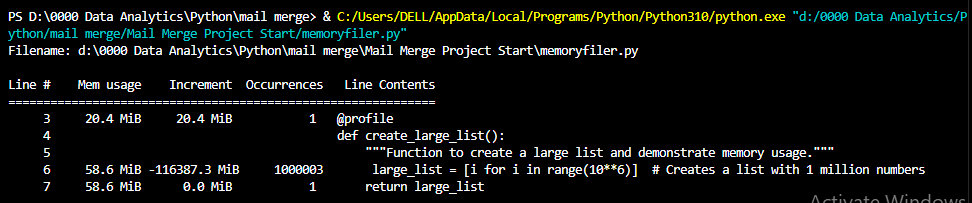

In [40]:
#Q17) Write a Python program to create and write a list of numbers to a file, one number per line

def write_numbers_to_file(filename, numbers):
    """Writes a list of numbers to a file, one per line."""
    try:
        with open(filename, "w") as file:
            for number in numbers:
                file.write(f"{number}\n")  # Write each number on a new line
        print(f"Numbers successfully written to {filename}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
numbers_list = list(range(1, 21))  # Generates numbers from 1 to 20
write_numbers_to_file("numbers.txt", numbers_list)


Numbers successfully written to numbers.txt


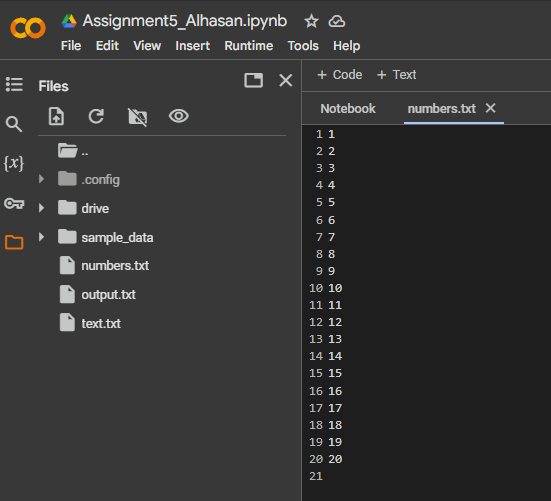

In [41]:
#Q18)  How would you implement a basic logging setup that logs to a file with rotation after 1MB

import logging
from logging.handlers import RotatingFileHandler

# Configure logging
log_filename = "app.log"
log_formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")

# Create a rotating file handler (1MB max size, keeps 3 old log files)
handler = RotatingFileHandler(log_filename, maxBytes=1_000_000, backupCount=3)
handler.setFormatter(log_formatter)

# Configure the root logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.addHandler(handler)

# Example log messages
for i in range(10000):  # Generate a lot of logs to trigger rotation
    logger.info(f"Log message {i}")


Streaming output truncated to the last 5000 lines.
INFO:root:Log message 5000
INFO:root:Log message 5001
INFO:root:Log message 5002
INFO:root:Log message 5003
INFO:root:Log message 5004
INFO:root:Log message 5005
INFO:root:Log message 5006
INFO:root:Log message 5007
INFO:root:Log message 5008
INFO:root:Log message 5009
INFO:root:Log message 5010
INFO:root:Log message 5011
INFO:root:Log message 5012
INFO:root:Log message 5013
INFO:root:Log message 5014
INFO:root:Log message 5015
INFO:root:Log message 5016
INFO:root:Log message 5017
INFO:root:Log message 5018
INFO:root:Log message 5019
INFO:root:Log message 5020
INFO:root:Log message 5021
INFO:root:Log message 5022
INFO:root:Log message 5023
INFO:root:Log message 5024
INFO:root:Log message 5025
INFO:root:Log message 5026
INFO:root:Log message 5027
INFO:root:Log message 5028
INFO:root:Log message 5029
INFO:root:Log message 5030
INFO:root:Log message 5031
INFO:root:Log message 5032
INFO:root:Log message 5033
INFO:root:Log message 5034
INFO

In [42]:
#Q19) Write a program that handles both IndexError and KeyError using a try-except block

def access_elements():
    """Attempts to access a list index and a dictionary key, handling errors."""
    my_list = [10, 20, 30]
    my_dict = {"name": "Alhasan", "age": 25}

    try:
        # Attempt to access an out-of-range index
        print("List value:", my_list[5])  # IndexError

        # Attempt to access a missing dictionary key
        print("Dictionary value:", my_dict["score"])  # KeyError

    except IndexError:
        print("Error: List index is out of range!")

    except KeyError:
        print("Error: The requested key does not exist in the dictionary!")

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Run the function
access_elements()


Error: List index is out of range!


In [44]:
#Q20) How would you open a file and read its contents using a context manager in Python

def read_file(filename):
    """Reads and prints the content of a file using a context manager."""
    try:
        with open(filename, "r") as file:  # Open file in read mode
            content = file.read()  # Read entire file content
            print("File Contents:\n")
            print(content)
    except FileNotFoundError:
        print("Error: The file does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
read_file("text.txt")  # Replace with your actual file name


File Contents:

Hi, I'm Alhasan
Currently writing assignment
file handling

This is a new line appended to the file.


In [45]:
#Q21) Write a Python program that reads a file and prints the number of occurrences of a specific word


def count_word(filename, word):
    try:
        with open(filename, "r") as file:
            content = file.read().lower()  # Read file and convert to lowercase

        word_count = content.split().count(word.lower())  # Count occurrences of the word
        print(f"The word '{word}' appears {word_count} times in '{filename}'.")

    except FileNotFoundError:
        print("Error: The file does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
filename = "test.txt"  # Replace with your actual file name
search_word = "hi"  # Replace with the word you want to count
count_word(filename, search_word)


The word 'hi' appears 3 times in 'test.txt'.


In [ ]:
#Q22) How can you check if a file is empty before attempting to read its contents?

import os

def is_file_empty(filename):
    """Checks if a file is empty before reading."""
    return os.path.exists(filename) and os.path.getsize(filename) == 0

# Example usage
filename = "example.txt"

if is_file_empty(filename):
    print("The file is empty.")
else:
    with open(filename, "r") as file:
        content = file.read()
        print("File Content:\n", content)


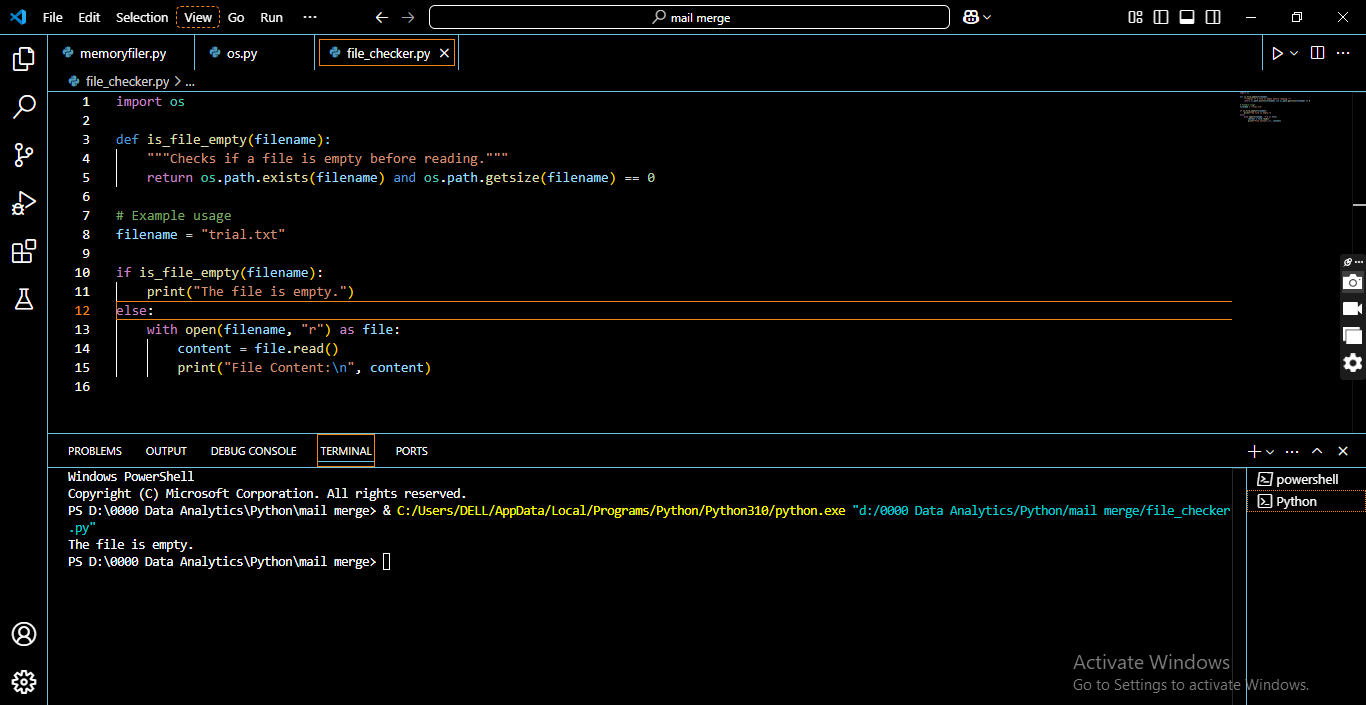

In [46]:
#Q23) Write a Python program that writes to a log file when an error occurs during file handling

import logging

# Configure logging
log_filename = "error.log"
logging.basicConfig(
    filename=log_filename,
    level=logging.ERROR,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

def read_file(filename):
    """Attempts to read a file and logs an error if it fails."""
    try:
        with open(filename, "r") as file:
            content = file.read()
            print("File Content:\n", content)
    except FileNotFoundError:
        logging.error(f"File '{filename}' not found.")
        print("Error: The file does not exist. Check the log file for details.")
    except PermissionError:
        logging.error(f"Permission denied for file '{filename}'.")
        print("Error: Permission denied. Check the log file for details.")
    except Exception as e:
        logging.error(f"Unexpected error while opening '{filename}': {e}")
        print("Error: An unexpected issue occurred. Check the log file for details.")

# Example usage
read_file("file.txt")  # Replace with your filename


ERROR:root:File 'file.txt' not found.


Error: The file does not exist. Check the log file for details.
